# download ollama api

In [5]:
!sudo apt-get install -y pciutils
!curl -fsSL https://ollama.com/install.sh | sh
from IPython.display import clear_output

# Create a Python script to start the Ollama API server in a separate thread

import os
import threading
import subprocess
import requests
import json

def ollama():
    os.environ['OLLAMA_HOST'] = '0.0.0.0:11434'
    os.environ['OLLAMA_ORIGINS'] = '*'
    subprocess.Popen(["ollama", "serve"])

ollama_thread = threading.Thread(target=ollama)
ollama_thread.start()

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libpci3 pci.ids
The following NEW packages will be installed:
  libpci3 pci.ids pciutils
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 343 kB of archives.
After this operation, 1,581 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 pci.ids all 0.0~2022.01.22-1 [251 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libpci3 amd64 1:3.7.0-6 [28.9 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 pciutils amd64 1:3.7.0-6 [63.6 kB]
Fetched 343 kB in 1s (260 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 3.)
debconf: falling back to frontend: Readline
debconf: unable to initializ

In [6]:
#download model
from IPython.display import clear_output
!ollama pull llama3.1:8b
clear_output()

In [7]:
#installing adalflow
!pip install -U lightrag[ollama]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 51.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.1/159.1 kB 8.7 MB/s eta 0:00:00


In [8]:
#creating a generator function

from lightrag.core.generator import Generator
from lightrag.core.component import Component
from lightrag.core.model_client import ModelClient
from lightrag.components.model_client import OllamaClient, GroqAPIClient

import time

#defining a prompt template
qa_template = r"""<SYS>
You are a helpful assistant.
</SYS>
User: {{input_str}}
You:"""

class SimpleQA(Component):
    def __init__(self, model_client: ModelClient, model_kwargs: dict):
        super().__init__()
        self.generator = Generator(
            model_client=model_client,
            model_kwargs=model_kwargs,
            template=qa_template,
        )

    def call(self, input: dict) -> str:
        return self.generator.call({"input_str": str(input)})

    async def acall(self, input: dict) -> str:
        return await self.generator.acall({"input_str": str(input)})

In [9]:
#creating inference
from lightrag.components.model_client import OllamaClient
from IPython.display import Markdown, display
model = {
    "model_client": OllamaClient(),
    "model_kwargs": {"model": "llama3.1:8b"}
}
qa = SimpleQA(**model)
output=qa("what is happiness")
display(Markdown(f"**Answer:** {output.data}"))

**Answer:** What a wonderful topic!

Happiness is a complex and subjective experience that can be defined in many ways. However, at its core, it's a feeling of joy, contentment, and well-being that people often strive for.

Research suggests that happiness is linked to a combination of factors, including:

1. **Positive emotions**: Experiencing feelings like gratitude, love, and excitement.
2. **Good physical health**: Taking care of one's physical needs and enjoying good health.
3. **Strong social connections**: Building and maintaining meaningful relationships with others.
4. **Personal growth**: Pursuing passions, learning new things, and developing a sense of purpose.
5. **Resilience**: Bouncing back from challenges and setbacks.

Some people also believe that happiness comes from within, and that it's a mindset or an attitude that can be cultivated through practices like:

1. **Mindfulness**: Being present in the moment and letting go of worries about the past or future.
2. **Gratitude**: Focusing on the good things in life and expressing appreciation for them.
3. **Self-care**: Taking care of one's physical, emotional, and mental well-being.

Ultimately, happiness is a unique experience that can mean different things to each person. What brings you joy and happiness?

In [2]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 74.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 102.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 14.8 MB/s eta 0:00:00


In [10]:
# Gradio chat interface (optional)
import gradio as gr

def chat(inp):
    try:
        output = qa(inp)
        return output.data
    except Exception as e:
        return f"Error: {str(e)}"

iface = gr.Interface(fn=chat, inputs="text", outputs="text", title="SimpleQA with Llama3")
iface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://4420b801ac404250bc.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Output:


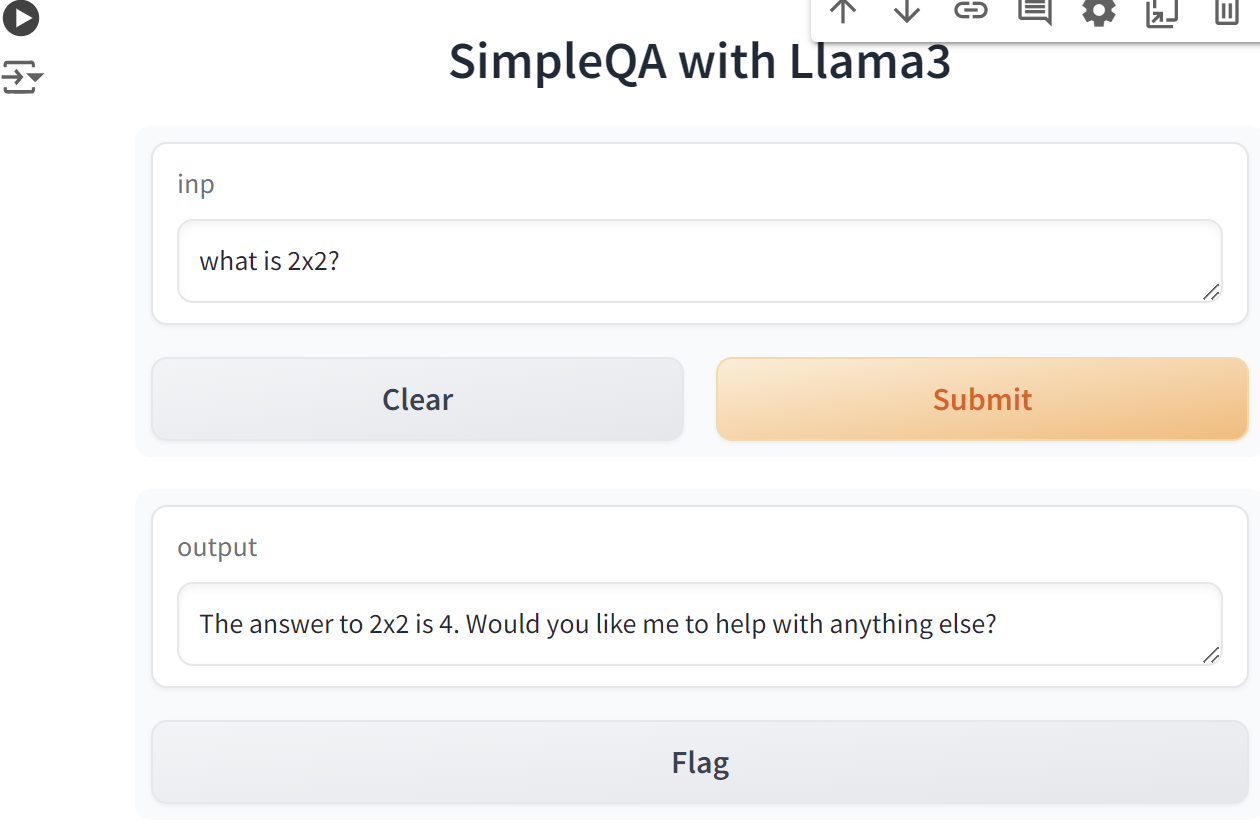